In [1]:
import numpy as np

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
# Create data sets for comaprison
from ipynb.fs.defs.datasets import default_sets, N_DIM
datasets = default_sets()
dname = "fitted"

In [3]:
# Get distance function and expected distribution
from ipynb.fs.defs.covfit import fitted, BEE2
from scipy.stats import chi2
expected = BEE2(df=N_DIM)
dist = fitted
dname = "fitted"

In [4]:
# Compute distances
distances = {}
for name, data in datasets.items():
    distances[name] = dist(data)

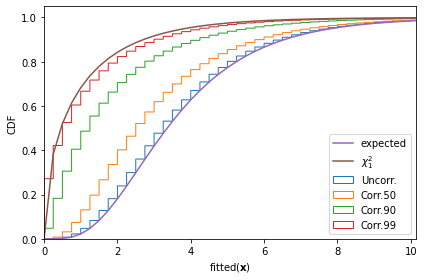

In [5]:
# Compare cumulative distributions
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(0, 2000, 8001)
for name in datasets:
    ax.hist(distances[name], bins=x, histtype="step",
        density=True, cumulative=True, linestyle='solid',
        label=name)
ax.plot(x, expected.cdf(x), label=f"expected")
ax.plot(x, chi2.cdf(x,df=1), label=f"$\chi^2_1$")
ax.set_xlim(0, expected.mean() + expected.std()*3)
ax.set_xlabel(f"{dname}$(\mathbf{{x}})$")
ax.set_ylabel("CDF")
ax.legend(loc="lower right")
fig.tight_layout()
fig.savefig(f"plots/{dname}_cdf.pdf")

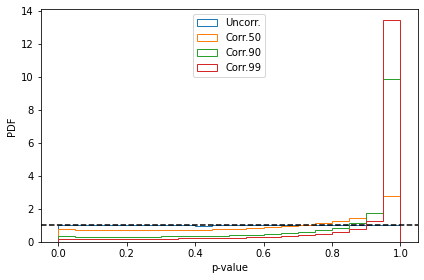

In [6]:
# Spread of p-values
fig, ax = plt.subplots()
x = np.linspace(0, 1, 21)
for name, data in distances.items():
    ax.hist(expected.sf(data), bins=x, histtype="step",
        density=True, cumulative=False, linestyle='solid',
        label=name)
ax.axhline(1., color="k", linestyle="dashed")
#ax.set_yscale("log")
ax.set_xlabel("p-value")
ax.set_ylabel("PDF")
ax.legend(loc="upper center")
fig.tight_layout()
fig.savefig(f"plots/{dname}_p-values.pdf")

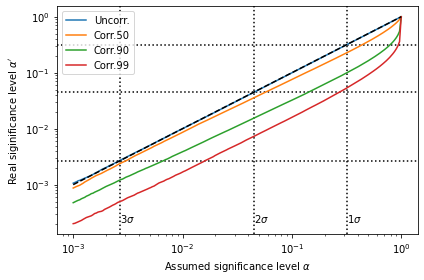

In [7]:
# siginifcance levels
fig, ax = plt.subplots()
for s in [1,2,3]:
    SL = chi2.sf(s**2, df=1)
    ax.axhline(SL, color="k", linestyle="dotted")
    ax.axvline(SL, color="k", linestyle="dotted")
    ax.annotate(f"${s}\sigma $ ", (SL, 0.05), xycoords=("data", "axes fraction"))
    
x = np.logspace(-3, 0, 200)
for name, data in distances.items():
    y = np.sum(data[:,np.newaxis] >= expected.isf(x), axis=0) / len(data)
    ax.plot(x, y, label=name)
ax.plot([1e-3,1], [1e-3,1], color="k", linestyle="dashed")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"Real siginificance level $\alpha'$")
ax.set_xlabel(r"Assumed significance level $\alpha$")
ax.legend(loc="upper left")
fig.tight_layout()
fig.savefig(f"plots/{dname}_significance.pdf")